In [292]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("dataset.csv")
df.head()

,Title,People_Review,Selling_Price,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Original_Price,Chat_Responce_Rate
0,World Times The Political World Map Edited by ...,100 Ratings,Rs. 300,Free,98%,97%,Not Found,Not Found,100%
1,thik grow and rich#rich dad poor dad,61 Ratings,Rs. 400,Free,82%,100%,-55%,Rs. 895,86%
2,Peer e Kamil By umer Ahmed Best Selling Urdu Book,113 Ratings,Rs. 628,Rs. 99,80%,100%,-58%,"Rs. 1,500",97%
3,The Silent Patient Novel by Alex Michaelides,43 Ratings,Rs. 250,Free,81%,100%,-75%,Rs. 999,100%
4,"Rich Dad, Poor Dad / Atomic Habits /Think and ...",238 Ratings,Rs. 899,Free,87%,100%,-80%,"Rs. 4,499",100%


In [293]:
df = df[['Title', 'People_Review', 'Deliver_Charges', 'Seller_Rating', 'Shipping_Timing_Rating', 'Discount_Percentage', 'Selling_Price', 'Original_Price', 'Chat_Responce_Rate']]
df.head()

,Title,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
0,World Times The Political World Map Edited by ...,100 Ratings,Free,98%,97%,Not Found,Rs. 300,Not Found,100%
1,thik grow and rich#rich dad poor dad,61 Ratings,Free,82%,100%,-55%,Rs. 400,Rs. 895,86%
2,Peer e Kamil By umer Ahmed Best Selling Urdu Book,113 Ratings,Rs. 99,80%,100%,-58%,Rs. 628,"Rs. 1,500",97%
3,The Silent Patient Novel by Alex Michaelides,43 Ratings,Free,81%,100%,-75%,Rs. 250,Rs. 999,100%
4,"Rich Dad, Poor Dad / Atomic Habits /Think and ...",238 Ratings,Free,87%,100%,-80%,Rs. 899,"Rs. 4,499",100%


In [294]:
df = df.replace({'Deliver_Charges': {'Free':np.NaN}})
df = df.replace({'Discount_Percentage': {'Not Found':np.NaN}})
df = df.replace({'Original_Price': {'Not Found':np.NaN}})
df.head()

,Title,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
0,World Times The Political World Map Edited by ...,100 Ratings,NaN,98%,97%,NaN,Rs. 300,NaN,100%
1,thik grow and rich#rich dad poor dad,61 Ratings,NaN,82%,100%,-55%,Rs. 400,Rs. 895,86%
2,Peer e Kamil By umer Ahmed Best Selling Urdu Book,113 Ratings,Rs. 99,80%,100%,-58%,Rs. 628,"Rs. 1,500",97%
3,The Silent Patient Novel by Alex Michaelides,43 Ratings,NaN,81%,100%,-75%,Rs. 250,Rs. 999,100%
4,"Rich Dad, Poor Dad / Atomic Habits /Think and ...",238 Ratings,NaN,87%,100%,-80%,Rs. 899,"Rs. 4,499",100%


In [295]:
# As book title has not effect on output label so we drop this column
df = df.drop('Title', axis=1)
df

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
0,100 Ratings,NaN,98%,97%,NaN,Rs. 300,NaN,100%
1,61 Ratings,NaN,82%,100%,-55%,Rs. 400,Rs. 895,86%
2,113 Ratings,Rs. 99,80%,100%,-58%,Rs. 628,"Rs. 1,500",97%
3,43 Ratings,NaN,81%,100%,-75%,Rs. 250,Rs. 999,100%
4,238 Ratings,NaN,87%,100%,-80%,Rs. 899,"Rs. 4,499",100%
...,...,...,...,...,...,...,...,...
4076,6 Ratings,NaN,87%,100%,-78%,Rs. 445,"Rs. 1,999",100%
4077,3 Ratings,NaN,98%,98%,NaN,Rs. 500,NaN,100%
4078,465 Ratings,NaN,89%,98%,-1%,Rs. 395,Rs. 399,99%
4079,4 Ratings,NaN,New Seller,100%,-20%,Rs. 682,Rs. 850,93%


In [296]:
# Removing digits and special characters from the digits values
df['People_Review'] = df['People_Review'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df['Selling_Price'] = df['Selling_Price'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df['Seller_Rating'] = df['Seller_Rating'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df['Shipping_Timing_Rating'] = df['Shipping_Timing_Rating'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df['Chat_Responce_Rate'] = df['Chat_Responce_Rate'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df['Deliver_Charges'] = df['Deliver_Charges'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df['Discount_Percentage'] = df['Discount_Percentage'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\-\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df['Original_Price'] = df['Original_Price'].str.replace(r'[a-zA-Z!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', '', regex=True)
df.head()

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
0,100,NaN,98,97,NaN,300,NaN,100
1,61,NaN,82,100,55,400,895,86
2,113,99,80,100,58,628,1500,97
3,43,NaN,81,100,75,250,999,100
4,238,NaN,87,100,80,899,4499,100


## EDA

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   People_Review           4081 non-null   object
 1   Deliver_Charges         714 non-null    object
 2   Seller_Rating           4081 non-null   object
 3   Shipping_Timing_Rating  4081 non-null   object
 4   Discount_Percentage     3763 non-null   object
 5   Selling_Price           4081 non-null   object
 6   Original_Price          3763 non-null   object
 7   Chat_Responce_Rate      4080 non-null   object
dtypes: object(8)
memory usage: 255.2+ KB


In [298]:
df.describe()

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
count,4081,714,4081,4081,3763,4081,3763,4080
unique,146,10,27,24,83,407,164,30
top,,99,87,100,1,299,1999,100
freq,1694,457,858,2812,327,221,560,2145


In [299]:
df.isna().sum()

People_Review                0
Deliver_Charges           3367
Seller_Rating                0
Shipping_Timing_Rating       0
Discount_Percentage        318
Selling_Price                0
Original_Price             318
Chat_Responce_Rate           1
dtype: int64

In [300]:
df.head()

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
0,100,NaN,98,97,NaN,300,NaN,100
1,61,NaN,82,100,55,400,895,86
2,113,99,80,100,58,628,1500,97
3,43,NaN,81,100,75,250,999,100
4,238,NaN,87,100,80,899,4499,100


In [301]:
# If origin price is zero its means original price is equal to the selling price, for doing this we make transpose
df = df.transpose()
df.head(30)

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
People_Review,100,61,113,43,238,12,138,93,65,135,...,63,53,412,5,4,6,3,465,4,
Deliver_Charges,NaN,NaN,99,NaN,NaN,NaN,99,99,99,NaN,...,NaN,NaN,119,NaN,99,NaN,NaN,NaN,NaN,NaN
Seller_Rating,98,82,80,81,87,88,89,91,89,87,...,98,98,96,98,89,87,98,89,,98
Shipping_Timing_Rating,97,100,100,100,100,100,100,100,100,100,...,98,98,100,98,100,100,98,98,100,98
Discount_Percentage,NaN,55,58,75,80,NaN,11,17,35,81,...,23,NaN,1,NaN,73,78,NaN,1,20,25
Selling_Price,300,400,628,250,899,1045,979,499,587,329,...,880,400,593,400,1348,445,500,395,682,300
Original_Price,NaN,895,1500,999,4499,NaN,1099,599,899,1699,...,1150,NaN,599,NaN,5000,1999,NaN,399,850,400
Chat_Responce_Rate,100,86,97,100,100,88,98,91,98,100,...,100,100,68,100,87,100,100,99,93,100


In [302]:
# Use a conditional statement to replace NaN values in the selected row (Original Price) with values from the row above (Selling Price)
df.iloc[6] = df.iloc[6].where(df.iloc[6].notna(), df.iloc[5])
df.head(30)

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
People_Review,100,61,113,43,238,12,138,93,65,135,...,63,53,412,5,4,6,3,465,4,
Deliver_Charges,NaN,NaN,99,NaN,NaN,NaN,99,99,99,NaN,...,NaN,NaN,119,NaN,99,NaN,NaN,NaN,NaN,NaN
Seller_Rating,98,82,80,81,87,88,89,91,89,87,...,98,98,96,98,89,87,98,89,,98
Shipping_Timing_Rating,97,100,100,100,100,100,100,100,100,100,...,98,98,100,98,100,100,98,98,100,98
Discount_Percentage,NaN,55,58,75,80,NaN,11,17,35,81,...,23,NaN,1,NaN,73,78,NaN,1,20,25
Selling_Price,300,400,628,250,899,1045,979,499,587,329,...,880,400,593,400,1348,445,500,395,682,300
Original_Price,300,895,1500,999,4499,1045,1099,599,899,1699,...,1150,400,599,400,5000,1999,500,399,850,400
Chat_Responce_Rate,100,86,97,100,100,88,98,91,98,100,...,100,100,68,100,87,100,100,99,93,100


In [306]:
# To change it in the original shape
df = df.transpose()
df.head()

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
0,100,NaN,98,97,NaN,300,300,100
1,61,NaN,82,100,55,400,895,86
2,113,99,80,100,58,628,1500,97
3,43,NaN,81,100,75,250,999,100
4,238,NaN,87,100,80,899,4499,100


In [307]:
# Replace '' spaces with NaN values
df['People_Review'] = df['People_Review'].replace('', np.nan)
df['Deliver_Charges'] = df['Deliver_Charges'].replace('', np.nan)
df['Seller_Rating'] = df['Seller_Rating'].replace('', np.nan)
df['Original_Price'] = df['Original_Price'].replace('', np.nan)
df['Shipping_Timing_Rating'] = df['Shipping_Timing_Rating'].replace('', np.nan)
df['Discount_Percentage'] = df['Discount_Percentage'].replace('', np.nan)
df['Original_Price'] = df['Original_Price'].replace('', np.nan)
df['Chat_Responce_Rate'] = df['Chat_Responce_Rate'].replace('', np.nan)
df['Selling_Price'] = df['Selling_Price'].replace('', np.nan)

# Replace ' ' spaces with NaN values
df['People_Review'] = df['People_Review'].replace(' ', np.nan)
df['Deliver_Charges'] = df['Deliver_Charges'].replace(' ', np.nan)
df['Seller_Rating'] = df['Seller_Rating'].replace(' ', np.nan)
df['Original_Price'] = df['Original_Price'].replace(' ', np.nan)
df['Shipping_Timing_Rating'] = df['Shipping_Timing_Rating'].replace(' ', np.nan)
df['Discount_Percentage'] = df['Discount_Percentage'].replace(' ', np.nan)
df['Original_Price'] = df['Original_Price'].replace(' ', np.nan)
df['Chat_Responce_Rate'] = df['Chat_Responce_Rate'].replace(' ', np.nan)
df['Selling_Price'] = df['Selling_Price'].replace(' ', np.nan)

# Replace '  ' spaces with NaN values
df['People_Review'] = df['People_Review'].replace('  ', np.nan)
df['Deliver_Charges'] = df['Deliver_Charges'].replace('  ', np.nan)
df['Seller_Rating'] = df['Seller_Rating'].replace('  ', np.nan)
df['Original_Price'] = df['Original_Price'].replace('  ', np.nan)
df['Shipping_Timing_Rating'] = df['Shipping_Timing_Rating'].replace('  ', np.nan)
df['Discount_Percentage'] = df['Discount_Percentage'].replace('  ', np.nan)
df['Original_Price'] = df['Original_Price'].replace('  ', np.nan)
df['Chat_Responce_Rate'] = df['Chat_Responce_Rate'].replace('  ', np.nan)
df['Selling_Price'] = df['Selling_Price'].replace('  ', np.nan)

In [308]:
# To change data type to int, first we all NaN values to 0
df = df.fillna(value=0)

In [309]:
# Convert data type to int
df['People_Review'] = df['People_Review'].astype(float).astype(int) 
df['Deliver_Charges'] = df['Deliver_Charges'].astype(float).astype(int) 
df['Seller_Rating'] = df['Seller_Rating'].astype(float).astype(int) 
df['Shipping_Timing_Rating'] = df['Shipping_Timing_Rating'].astype(float).astype(int) 
df['Discount_Percentage'] = df['Discount_Percentage'].astype(float).astype(int) 
df['Original_Price'] = df['Original_Price'].astype(float).astype(int) 
df['Chat_Responce_Rate'] = df['Chat_Responce_Rate'].astype(float).astype(int) 
df['Selling_Price'] = df['Selling_Price'].astype(float).astype(int) 

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   People_Review           4081 non-null   int32
 1   Deliver_Charges         4081 non-null   int32
 2   Seller_Rating           4081 non-null   int32
 3   Shipping_Timing_Rating  4081 non-null   int32
 4   Discount_Percentage     4081 non-null   int32
 5   Selling_Price           4081 non-null   int32
 6   Original_Price          4081 non-null   int32
 7   Chat_Responce_Rate      4081 non-null   int32
dtypes: int32(8)
memory usage: 127.7 KB


In [311]:
# Replace spaces with NaN values
df['People_Review'] = df['People_Review'].replace(0, np.nan)
df['Deliver_Charges'] = df['Deliver_Charges'].replace(0, np.nan)
df['Seller_Rating'] = df['Seller_Rating'].replace(0, np.nan)
df['Original_Price'] = df['Original_Price'].replace(0, np.nan)
df['Shipping_Timing_Rating'] = df['Shipping_Timing_Rating'].replace(0, np.nan)
df['Discount_Percentage'] = df['Discount_Percentage'].replace(0, np.nan)
df['Original_Price'] = df['Original_Price'].replace(0, np.nan)
df['Chat_Responce_Rate'] = df['Chat_Responce_Rate'].replace(0, np.nan)
df['Selling_Price'] = df['Selling_Price'].replace(0, np.nan)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   People_Review           2386 non-null   float64
 1   Deliver_Charges         677 non-null    float64
 2   Seller_Rating           3803 non-null   float64
 3   Shipping_Timing_Rating  4045 non-null   float64
 4   Discount_Percentage     3762 non-null   float64
 5   Selling_Price           4044 non-null   float64
 6   Original_Price          4045 non-null   float64
 7   Chat_Responce_Rate      4034 non-null   float64
dtypes: float64(8)
memory usage: 255.2 KB


In [313]:
df.head()

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Selling_Price,Original_Price,Chat_Responce_Rate
0,100.0,NaN,98.0,97.0,NaN,300.0,300.0,100.0
1,61.0,NaN,82.0,100.0,55.0,400.0,895.0,86.0
2,113.0,99.0,80.0,100.0,58.0,628.0,1500.0,97.0
3,43.0,NaN,81.0,100.0,75.0,250.0,999.0,100.0
4,238.0,NaN,87.0,100.0,80.0,899.0,4499.0,100.0


In [314]:
# Drop all the rows where output label Selling_Price is zer
df = df.dropna(subset=['Selling_Price'])

## Train Test Split

In [373]:
y = df['Selling_Price']
X = df.drop('Selling_Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_train), len(y_train), len(X_test), len(y_test)

(3235, 3235, 809, 809)

In [374]:
X_train.head(10)

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Original_Price,Chat_Responce_Rate
2156,NaN,NaN,82.0,100.0,65.0,999.0,91.0
3590,NaN,NaN,86.0,100.0,77.0,1999.0,100.0
2112,7.0,NaN,87.0,100.0,67.0,995.0,100.0
92,145.0,NaN,98.0,97.0,1.0,600.0,100.0
2227,NaN,99.0,74.0,93.0,59.0,600.0,97.0
3158,NaN,NaN,NaN,100.0,8.0,325.0,100.0
1115,2.0,NaN,87.0,100.0,79.0,1999.0,100.0
1513,8.0,NaN,93.0,95.0,1.0,500.0,97.0
2752,NaN,99.0,80.0,100.0,38.0,1599.0,97.0
24,13.0,NaN,98.0,97.0,26.0,600.0,100.0


In [375]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 2156 to 3199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   People_Review           1920 non-null   float64
 1   Deliver_Charges         544 non-null    float64
 2   Seller_Rating           3036 non-null   float64
 3   Shipping_Timing_Rating  3235 non-null   float64
 4   Discount_Percentage     2999 non-null   float64
 5   Original_Price          3235 non-null   float64
 6   Chat_Responce_Rate      3226 non-null   float64
dtypes: float64(7)
memory usage: 202.2 KB


## Handling Outliers

<Axes: xlabel='People_Review', ylabel='Count'>

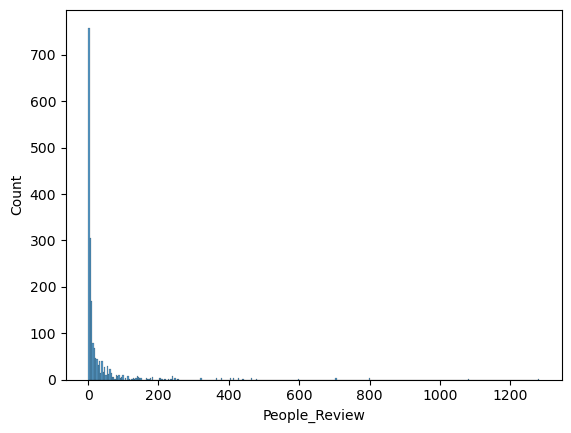

In [376]:
sns.histplot(x = 'People_Review', data = X_train)

<Axes: >

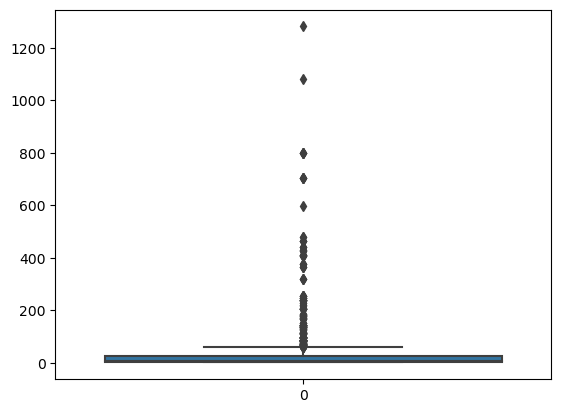

In [377]:
sns.boxplot(X_train['People_Review'])

In [378]:
q1 = df['People_Review'].quantile(.25)
q3 = df['People_Review'].quantile(.75)
iqr = q3 - q1
lower_limit = q1 - iqr * 1.5
upper_limit = q3 + iqr * 1.5
X_train = X_train.copy()
X_train['People_Review'] = np.where(X_train['People_Review'] < lower_limit, lower_limit, (np.where(X_train['People_Review'] > upper_limit, upper_limit, X_train['People_Review'])))

<Axes: xlabel='People_Review', ylabel='Count'>

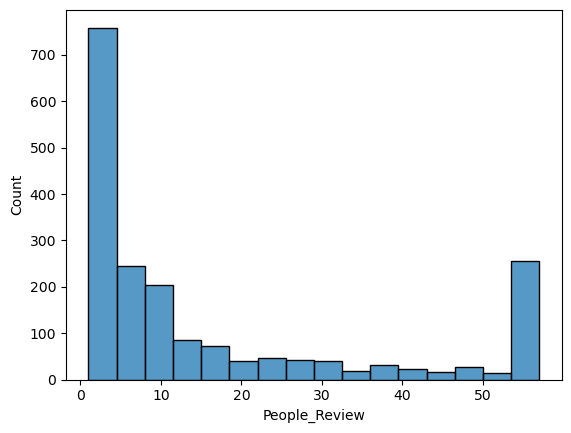

In [379]:
sns.histplot(x = 'People_Review', data = X_train)

<Axes: >

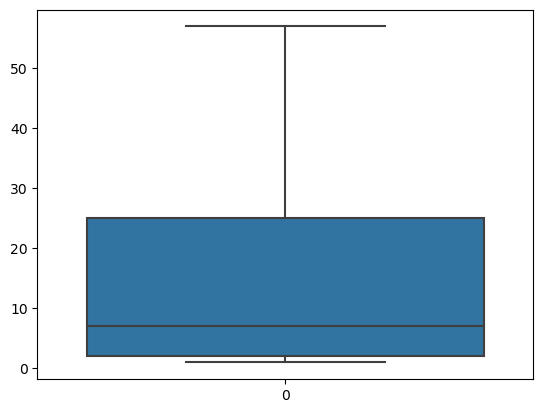

In [380]:
sns.boxplot(X_train['People_Review'])

<Axes: xlabel='Deliver_Charges', ylabel='Count'>

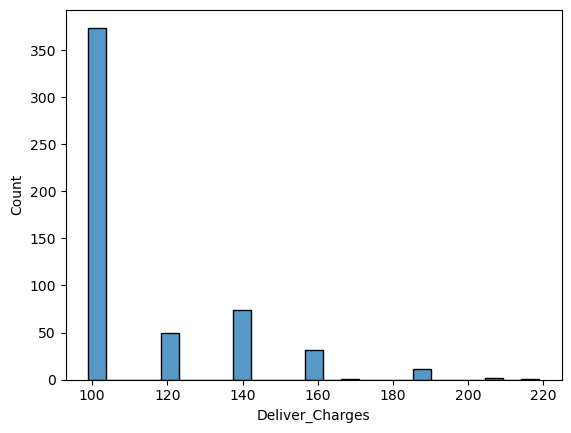

In [381]:
sns.histplot(x = 'Deliver_Charges', data = X_train)

<Axes: >

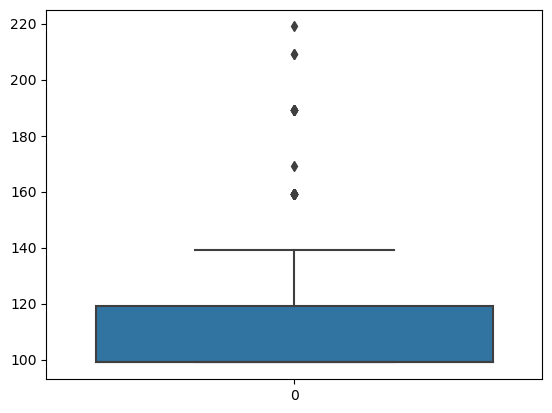

In [382]:
sns.boxplot(X_train['Deliver_Charges'])

In [383]:
q1 = df['Deliver_Charges'].quantile(.25)
q3 = df['Deliver_Charges'].quantile(.75)
iqr = q3 - q1
lower_limit = q1 - iqr * 1.5
upper_limit = q3 + iqr * 1.5
X_train = X_train.copy()
X_train['Deliver_Charges'] = np.where(X_train['Deliver_Charges'] < lower_limit, lower_limit, (np.where(X_train['Deliver_Charges'] > upper_limit, upper_limit, X_train['Deliver_Charges'])))

<Axes: xlabel='Deliver_Charges', ylabel='Count'>

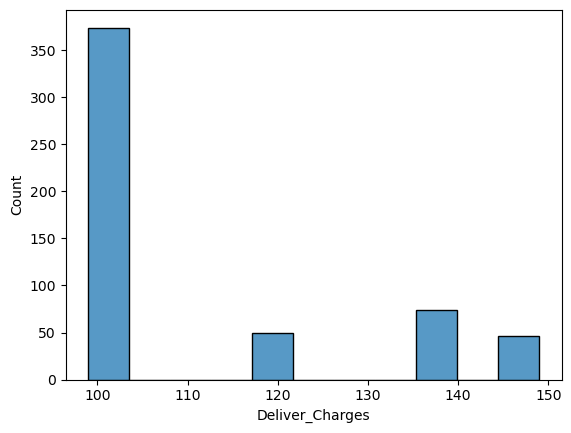

In [384]:
sns.histplot(x = 'Deliver_Charges', data = X_train)

<Axes: >

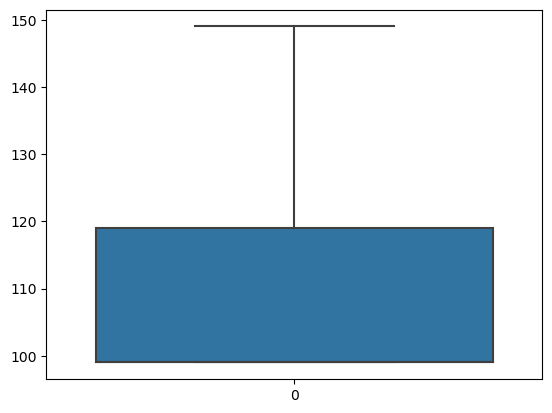

In [385]:
sns.boxplot(X_train['Deliver_Charges'])

<Axes: xlabel='Seller_Rating', ylabel='Count'>

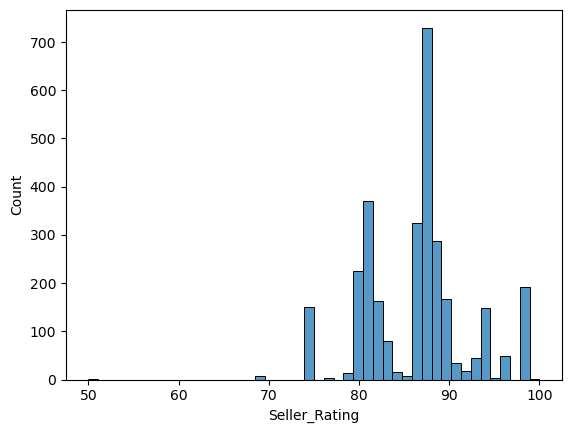

In [386]:
sns.histplot(x = 'Seller_Rating', data = X_train)

In [387]:
q1 = df['Seller_Rating'].quantile(.25)
q3 = df['Seller_Rating'].quantile(.75)
iqr = q3 - q1
lower_limit = q1 - iqr * 1.5
upper_limit = q3 + iqr * 1.5
X_train = X_train.copy()
X_train['Seller_Rating'] = np.where(X_train['Seller_Rating'] < lower_limit, lower_limit, (np.where(X_train['Seller_Rating'] > upper_limit, upper_limit, X_train['Seller_Rating'])))

<Axes: xlabel='Seller_Rating', ylabel='Count'>

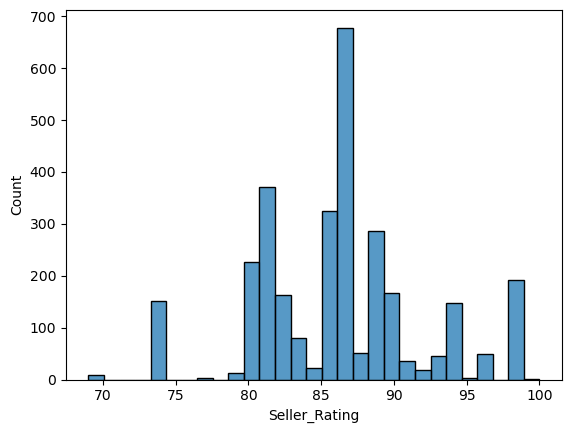

In [388]:
sns.histplot(x = 'Seller_Rating', data = X_train)

<Axes: xlabel='Shipping_Timing_Rating', ylabel='Count'>

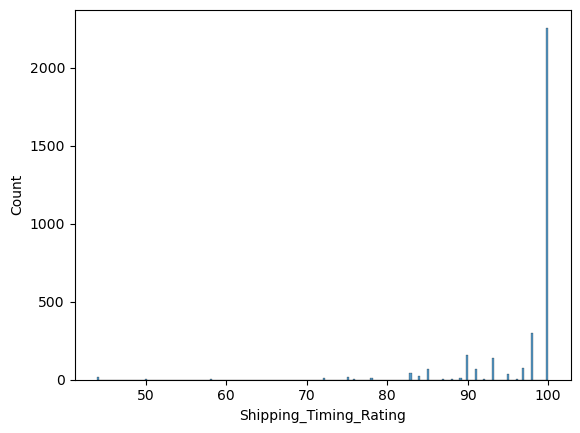

In [389]:
sns.histplot(x = 'Shipping_Timing_Rating', data = X_train)

In [390]:
q1 = df['Shipping_Timing_Rating'].quantile(.25)
q3 = df['Shipping_Timing_Rating'].quantile(.75)
iqr = q3 - q1
lower_limit = q1 - iqr * 1.5
upper_limit = q3 + iqr * 1.5
X_train = X_train.copy()
X_train['Shipping_Timing_Rating'] = np.where(X_train['Shipping_Timing_Rating'] < lower_limit, lower_limit, (np.where(X_train['Shipping_Timing_Rating'] > upper_limit, upper_limit, X_train['Shipping_Timing_Rating'])))

<Axes: xlabel='Shipping_Timing_Rating', ylabel='Count'>

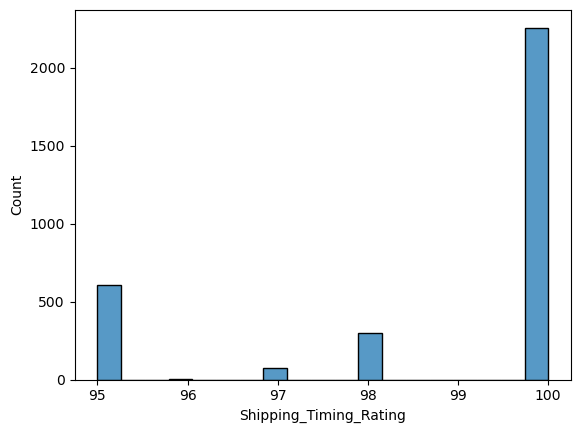

In [391]:
sns.histplot(x = 'Shipping_Timing_Rating', data = X_train)

<Axes: xlabel='Discount_Percentage', ylabel='Count'>

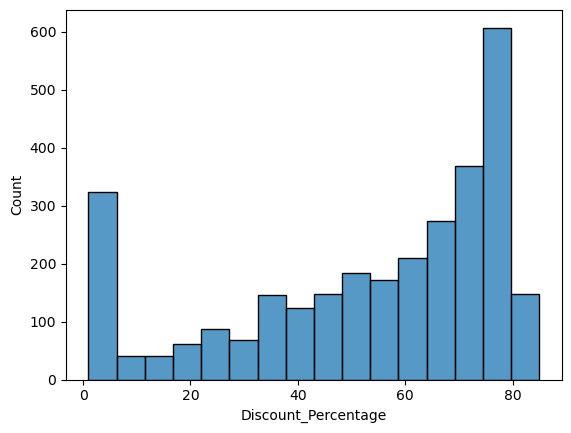

In [392]:
sns.histplot(x = 'Discount_Percentage', data = X_train)

<Axes: >

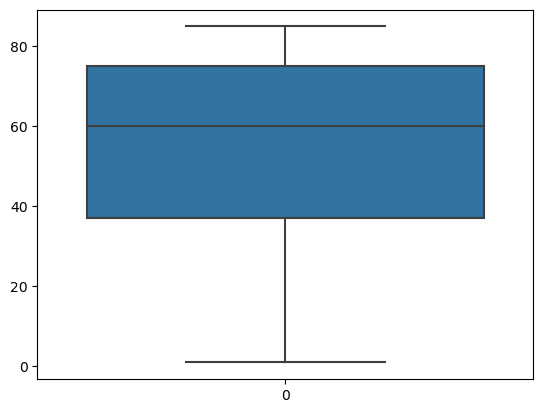

In [393]:
sns.boxplot(X_train['Discount_Percentage'])
# This coulmn does not have outliers

<Axes: xlabel='Original_Price', ylabel='Count'>

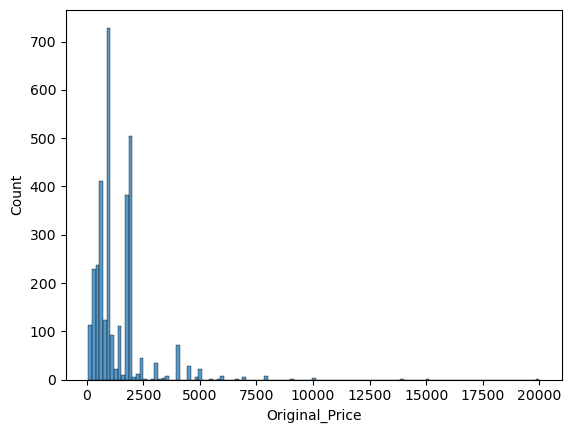

In [394]:
sns.histplot(x = 'Original_Price', data = X_train)

In [395]:
q1 = df['Original_Price'].quantile(.25)
q3 = df['Original_Price'].quantile(.75)
iqr = q3 - q1
lower_limit = q1 - iqr * 1.5
upper_limit = q3 + iqr * 1.5
X_train = X_train.copy()
X_train['Original_Price'] = np.where(X_train['Original_Price'] < lower_limit, lower_limit, (np.where(X_train['Original_Price'] > upper_limit, upper_limit, X_train['Original_Price'])))

<Axes: xlabel='Original_Price', ylabel='Count'>

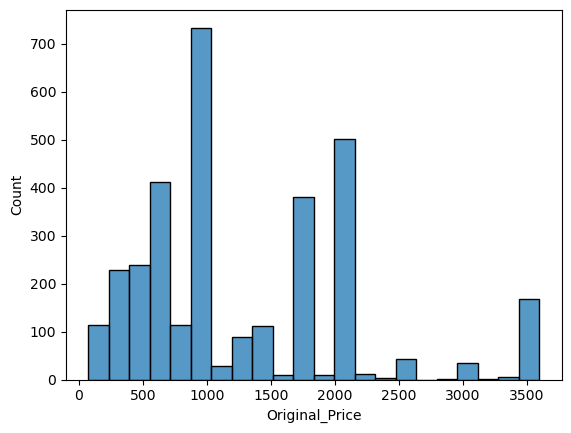

In [396]:
sns.histplot(x = 'Original_Price', data = X_train)

<Axes: xlabel='Chat_Responce_Rate', ylabel='Count'>

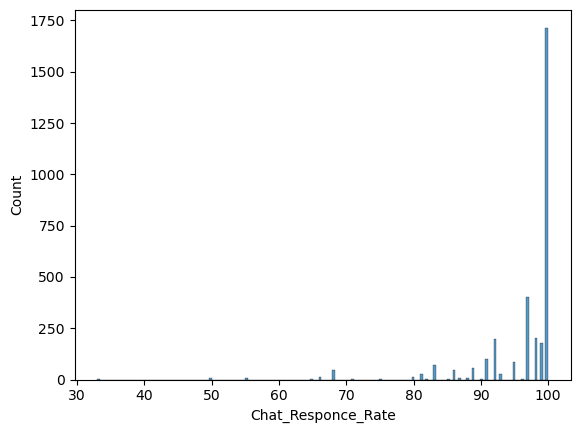

In [397]:
sns.histplot(x = 'Chat_Responce_Rate', data = X_train)

In [398]:
q1 = df['Chat_Responce_Rate'].quantile(.25)
q3 = df['Chat_Responce_Rate'].quantile(.75)
iqr = q3 - q1
lower_limit = q1 - iqr * 1.5
upper_limit = q3 + iqr * 1.5
X_train = X_train.copy()
X_train['Chat_Responce_Rate'] = np.where(X_train['Chat_Responce_Rate'] < lower_limit, lower_limit, (np.where(X_train['Chat_Responce_Rate'] > upper_limit, upper_limit, X_train['Chat_Responce_Rate'])))

<Axes: xlabel='Chat_Responce_Rate', ylabel='Count'>

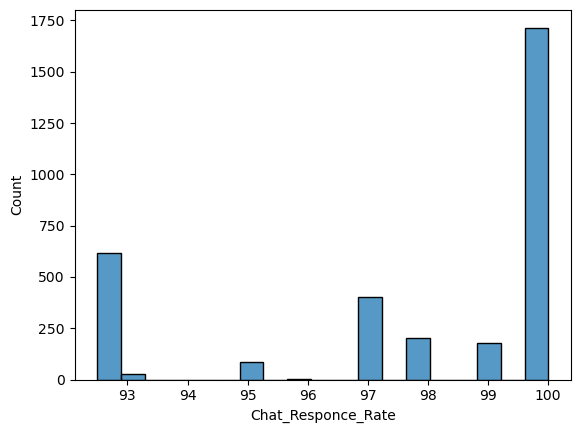

In [399]:
sns.histplot(x = 'Chat_Responce_Rate', data = X_train)

In [400]:
X_train.describe()

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Original_Price,Chat_Responce_Rate
count,1920.000000,544.000000,3036.000000,3235.000000,2999.000000,3235.000000,3226.000000
mean,16.397917,110.507353,86.232213,98.810819,52.853284,1282.307573,97.821606
std,19.449886,18.275766,5.677183,1.959723,25.296398,832.759635,2.915135
min,1.000000,99.000000,69.000000,95.000000,1.000000,75.000000,92.500000
25%,2.000000,99.000000,81.000000,98.000000,37.000000,600.000000,97.000000
50%,7.000000,99.000000,87.000000,100.000000,60.000000,999.000000,100.000000
75%,25.000000,119.000000,89.000000,100.000000,75.000000,1799.000000,100.000000
max,57.000000,149.000000,100.000000,100.000000,85.000000,3600.000000,100.000000


<Axes: xlabel='Chat_Responce_Rate', ylabel='Selling_Price'>

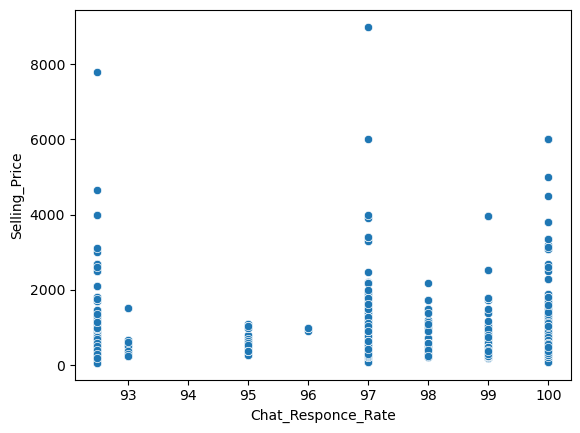

In [401]:
# To find collerations between the 'Chat_Responce_Rate' feature and output label
sns.scatterplot(x=X_train["Chat_Responce_Rate"],
                    y=y_train,
                )
# This scatterplot shows that there is no linear relationship between 'Chat_Responce_Rate' feature and output label, so we have to drop this column

<Axes: xlabel='Original_Price', ylabel='Selling_Price'>

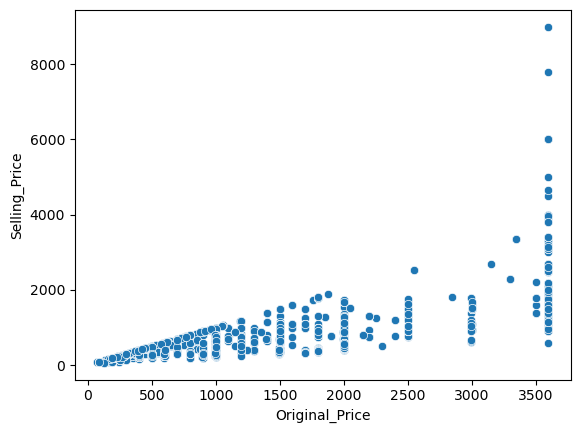

In [402]:
# To find collerations between the 'Original_Price' feature and output label
sns.scatterplot(x=X_train["Original_Price"],
                    y=y_train,
                )
# This scatterplot shows that there is linear relationship between 'Original_Price' feature and output label

<Axes: xlabel='Discount_Percentage', ylabel='Selling_Price'>

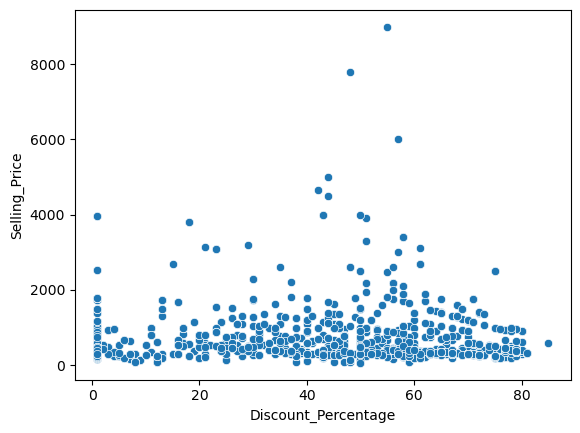

In [403]:
# To find collerations between the 'Discount_Percentage' feature and output label
sns.scatterplot(x=X_train["Discount_Percentage"],
                    y=y_train,
                )
# This scatterplot shows that there is no linear relationship between 'Discount_Percentage' feature and output label, so we have to drop this column

<Axes: xlabel='Shipping_Timing_Rating', ylabel='Selling_Price'>

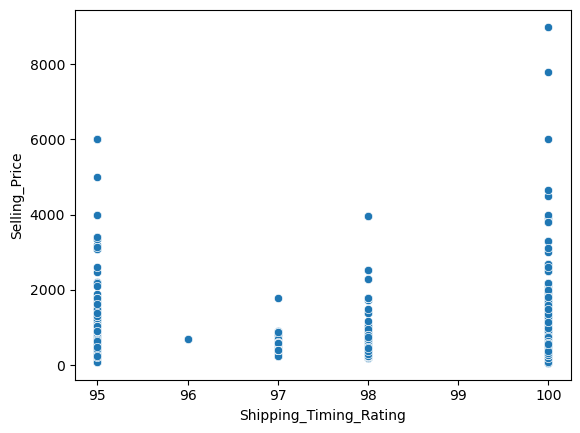

In [404]:
# To find collerations between the 'Shipping_Timing_Rating' feature and output label
sns.scatterplot(x=X_train["Shipping_Timing_Rating"],
                    y=y_train,
                )
# This scatterplot shows that there is no linear relationship between 'Shipping_Timing_Rating' feature and output label, so we have to drop this column

<Axes: xlabel='Seller_Rating', ylabel='Selling_Price'>

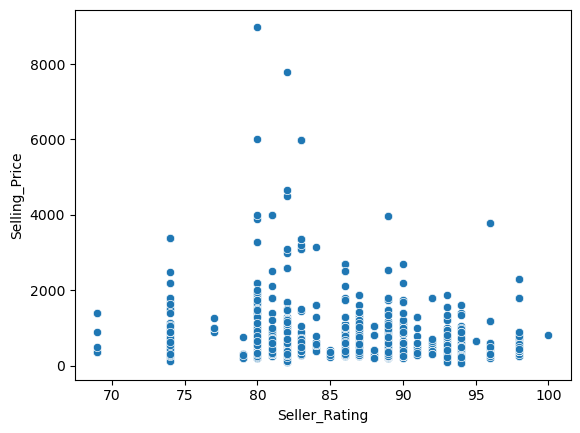

In [405]:
# To find collerations between the 'Seller_Rating' feature and output label
sns.scatterplot(x=X_train["Seller_Rating"],
                    y=y_train,
                )
# This scatterplot shows that there is no linear relationship between 'Seller_Rating' feature and output label, so we have to drop this column

<Axes: xlabel='Deliver_Charges', ylabel='Selling_Price'>

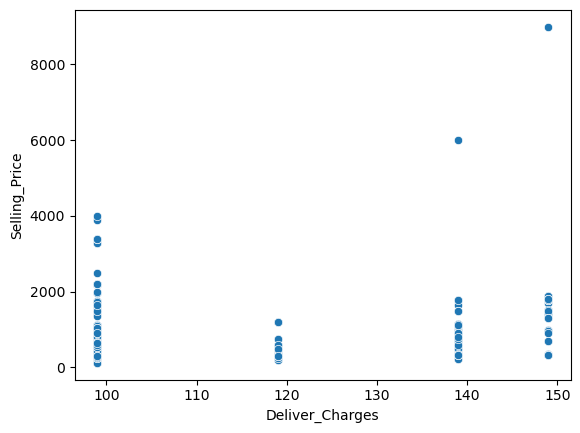

In [406]:
# To find collerations between the 'Deliver_Charges' feature and output label
sns.scatterplot(x=X_train["Deliver_Charges"],
                    y=y_train,
                )
# This scatterplot shows that there is relationship between 'Deliver_Charges' feature and output label

<Axes: xlabel='People_Review', ylabel='Selling_Price'>

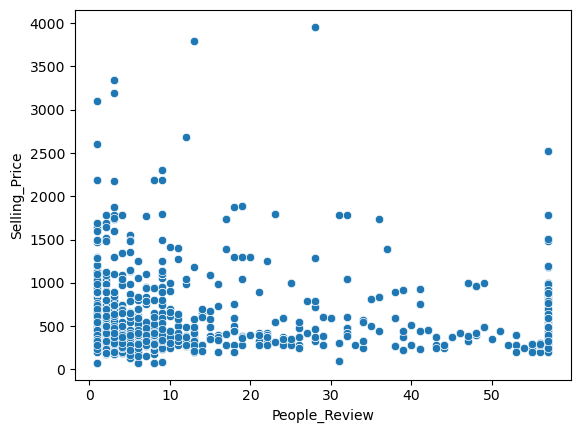

In [407]:
# To find collerations between the 'People_Review' feature and output label
sns.scatterplot(x=X_train["People_Review"],
                    y=y_train,
                )
# This scatterplot shows that there is no linear relationship between 'People_Review' feature and output label, so we have to drop this column

In [408]:
X_train.head()

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Original_Price,Chat_Responce_Rate
2156,NaN,NaN,82.0,100.0,65.0,999.0,92.5
3590,NaN,NaN,86.0,100.0,77.0,1999.0,100.0
2112,7.0,NaN,87.0,100.0,67.0,995.0,100.0
92,57.0,NaN,98.0,97.0,1.0,600.0,100.0
2227,NaN,99.0,74.0,95.0,59.0,600.0,97.0


In [409]:
X_train['People_Review'].mean()

16.397916666666667

In [410]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 2156 to 3199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   People_Review           1920 non-null   float64
 1   Deliver_Charges         544 non-null    float64
 2   Seller_Rating           3036 non-null   float64
 3   Shipping_Timing_Rating  3235 non-null   float64
 4   Discount_Percentage     2999 non-null   float64
 5   Original_Price          3235 non-null   float64
 6   Chat_Responce_Rate      3226 non-null   float64
dtypes: float64(7)
memory usage: 331.2 KB


In [411]:
# Imputing Missing Values using pandas fillna() method
X_train['People_Review'] = X_train['People_Review'].fillna(value = X_train['People_Review'].mean())
X_test['People_Review'] = X_test['People_Review'].fillna(value = X_test['People_Review'].mean())

X_train['Deliver_Charges'] = X_train['Deliver_Charges'].fillna(value = 0)
X_test['Deliver_Charges'] = X_test['Deliver_Charges'].fillna(value = 0)

X_train['Discount_Percentage'] = X_train['Discount_Percentage'].fillna(value = 0)
X_test['Discount_Percentage'] = X_test['Discount_Percentage'].fillna(value = 0)

X_train['Seller_Rating'] = X_train['Seller_Rating'].fillna(value = X_train['Seller_Rating'].mode()[0])
X_test['Seller_Rating'] = X_test['Seller_Rating'].fillna(value = X_test['Seller_Rating'].mode()[0])

X_train['Shipping_Timing_Rating'] = X_train['Shipping_Timing_Rating'].fillna(value = X_train['Shipping_Timing_Rating'].mode()[0])
X_test['Shipping_Timing_Rating'] = X_test['Shipping_Timing_Rating'].fillna(value = X_test['Shipping_Timing_Rating'].mode()[0])

X_train['Chat_Responce_Rate'] = X_train['Chat_Responce_Rate'].fillna(value = X_train['Chat_Responce_Rate'].mode()[0])
X_test['Chat_Responce_Rate'] = X_test['Chat_Responce_Rate'].fillna(value = X_test['Chat_Responce_Rate'].mode()[0])

X_train.head(10)

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Original_Price,Chat_Responce_Rate
2156,16.397917,0.0,82.0,100.0,65.0,999.0,92.5
3590,16.397917,0.0,86.0,100.0,77.0,1999.0,100.0
2112,7.000000,0.0,87.0,100.0,67.0,995.0,100.0
92,57.000000,0.0,98.0,97.0,1.0,600.0,100.0
2227,16.397917,99.0,74.0,95.0,59.0,600.0,97.0
3158,16.397917,0.0,87.0,100.0,8.0,325.0,100.0
1115,2.000000,0.0,87.0,100.0,79.0,1999.0,100.0
1513,8.000000,0.0,93.0,95.0,1.0,500.0,97.0
2752,16.397917,99.0,80.0,100.0,38.0,1599.0,97.0
24,13.000000,0.0,98.0,97.0,26.0,600.0,100.0


#### Using Pipeline

In [412]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# inputingDeCh = Pipeline(steps=
#                     [
#                         ('simpleImZaro', SimpleImputer(missing_values = np.nan, strategy='constant', fill_value=16.4))
#                    ])
# inputingDeCh = Pipeline(steps=
#                     [
#                         ('simpleImZaro', SimpleImputer(missing_values = np.nan, strategy='constant', fill_value=0))
#                     ])
# inputingPeRe = Pipeline(steps=[
#                         ('simpleImMean', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent'))
#                     ])

                    
# col_trans = ColumnTransformer(transformers=
#                               [
#                                 ('Encoder', inputingDeCh,[0]),
#                                 ('ImputerZero', inputingDeCh, [1,4]),
#                                 ('ImputeMean', inputingPeRe, [2,3,6])
#                               ])
# col_trans.fit(X_train)
# x_trained = col_trans.transform(X_train)
# X_tested = col_trans.transform(X_test)


In [413]:
X_train.head(10)

,People_Review,Deliver_Charges,Seller_Rating,Shipping_Timing_Rating,Discount_Percentage,Original_Price,Chat_Responce_Rate
2156,16.397917,0.0,82.0,100.0,65.0,999.0,92.5
3590,16.397917,0.0,86.0,100.0,77.0,1999.0,100.0
2112,7.000000,0.0,87.0,100.0,67.0,995.0,100.0
92,57.000000,0.0,98.0,97.0,1.0,600.0,100.0
2227,16.397917,99.0,74.0,95.0,59.0,600.0,97.0
3158,16.397917,0.0,87.0,100.0,8.0,325.0,100.0
1115,2.000000,0.0,87.0,100.0,79.0,1999.0,100.0
1513,8.000000,0.0,93.0,95.0,1.0,500.0,97.0
2752,16.397917,99.0,80.0,100.0,38.0,1599.0,97.0
24,13.000000,0.0,98.0,97.0,26.0,600.0,100.0


In [414]:
# As these columns does have any linear relationship with output label so drop them in the X_train dataset
X_train = X_train.drop(['People_Review', 'Seller_Rating', 'Shipping_Timing_Rating', 'Discount_Percentage', 'Chat_Responce_Rate'], axis = 1)

In [415]:
# As these columns does have any linear relationship with output label so drop them in the X_test dataset
X_test = X_test.drop(['People_Review', 'Seller_Rating', 'Shipping_Timing_Rating', 'Discount_Percentage', 'Chat_Responce_Rate'], axis = 1)

In [416]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
ss.fit(X_train)
# transform train and test sets
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [417]:
# convert the two numPy arrays to Pandas dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [418]:
X_train_scaled

,Deliver_Charges,Original_Price
0,-0.442416,-0.340256
1,-0.442416,0.860756
2,-0.442416,-0.345060
3,-0.442416,-0.819460
4,1.914531,-0.819460
...,...,...
3230,-0.442416,-0.345060
3231,-0.442416,0.860756
3232,-0.442416,0.620554
3233,-0.442416,0.860756


In [419]:
X_test_scaled

,Deliver_Charges,Original_Price
0,-0.442416,-0.345060
1,-0.442416,0.860756
2,-0.442416,0.860756
3,-0.442416,0.500453
4,-0.442416,-1.185769
...,...,...
804,1.914531,-0.820661
805,1.914531,-0.819460
806,-0.442416,-1.449991
807,-0.442416,-0.820661


In [420]:
y_test

2866    324.0
2493    445.0
3943    450.0
601     329.0
2575    295.0
        ...  
1632    385.0
3290    248.0
2577     75.0
4010    315.0
2844    450.0
Name: Selling_Price, Length: 809, dtype: float64

In [277]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = Lasso(alpha=10000000)
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# # Step 6: Make Predictions
# y_pred = model.predict(X_test)
# Step 7: Evaluate the Model
# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
# print("Coefficients: ", coefficients)
# print("Intercept: ", intercept)
# # # Evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
# print(y_test_pred)


print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [0. 0.]
Intercept: 558.2760432766615
Mean Squared Error: 214829.04670023159
R-squared: -0.0026799977554459176


## Pickling the Model

In [278]:
import pickle
fileName = 'model.sav'
pickle.dump(model, open(fileName, 'wb')) 

In [279]:
load_model = pickle.load(open(fileName, 'rb'))

In [281]:
r = load_model.score(X_test_scaled, y_test)
print(r)

-0.0026799977554459176


In [139]:
# model = Pipeline(steps=[
#                         ('preprocessing', col_trans),
#                         ('scaling', StandardScaler()),
#                         ('regressor', LinearRegression())
#                         ])
# model.fit(X_train, y_train)

# # Step 6: Make Predictions
# y_pred = model.predict(X_test)
# # Step 7: Evaluate the Model
# # Coefficients and intercept
# # coefficients = model.coef_
# # intercept = model.intercept_

# # Evaluation metrics
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # print(f'Coefficients: {coefficients}')
# # print(f'Intercept: {intercept}')
# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

Mean Squared Error: 235718.5306506084
R-squared: -0.10017830183582066
